[I can see how much daily calls I have used, on the web](http://access.alchemyapi.com/calls/info/GetAPIKeyInfo?apikey=my_API_key&outputMode=json)

# Goal:
There would be many ways to label samples such as using similar labeled datasets like tripadvisor with rating, however since I have hand-tested that [AlchemyAPI](www.alchemyapi.com) does very good job on detecting negative sentiment of a review data in this case, I decided to use the output labels that AlchemyAPI gives as labels of our reviews. 
- Label reviews with Alchemy Sentiment Analysis API and save the data in csv

## Test alchemyAPI

In [3]:
!python alchemyapi.py [my_API_key]

python: can't open file 'alchemyapi.py': [Errno 2] No such file or directory


In [247]:
!python example.py



            ,                                                                                                                              
      .I7777~                                                                                                                              
     .I7777777                                                                                                                             
   +.  77777777                                                                                                                            
 =???,  I7777777=                                                                                                                          
=??????   7777777?   ,:::===?                                                                                                              
=???????.  777777777777777777~         .77:    ??           :7                                              =$,     :$$$$$$+  =$?          
 ????????: .777777

In [5]:
cd ../../projects/alchemyapi/alchemyapi_python/

/Users/kimitakanakazawa/Dropbox/projects/alchemyapi/alchemyapi_python


In [6]:
ls

LICENSE         __init__.py     alchemyapi.pyc  example.py      tests.py
README.md       alchemyapi.py   api_key.txt     pigeon.jpg


In [6]:
from alchemyapi import AlchemyAPI
import alchemy_call_limit
alchemyapi = AlchemyAPI()

### Timeit 

In [7]:
%timeit int(alchemy_call_limit.alchemy_calls_left('my_API_key')['dailyTransactionLimit'])

1 loops, best of 3: 611 ms per loop


- I used textblob's [Sentiment Analyzers](http://textblob.readthedocs.org/en/dev/advanced_usage.html) before but AlchemyAPI is a lot faster in terms of processing a review data

## Testing with review data

In [8]:
myText = "cj was a responsive host who was easily accessible even though he was often not around the location is great in a safe neighborhood with an outstanding view of the bay bridge the room itself was in good shape the bathroom was falling apart a bit lots of peeling paint and a dirty foot rug the kitchens smoke detector was missing its battery lastly two rooms are rented out to airbnb guests not a huge deal but it wasn t mentioned in the description expect to be staying with anywhere from people"
response = alchemyapi.sentiment("text", myText)
print "Sentiment: ", response["docSentiment"]["score"], response["docSentiment"]["type"]

Sentiment:  -0.47451 negative


In [9]:
myText = "Pros: Location, access to washer & dryer\r\nCons: Dirty floors, dirty kitchen, disgusting shower, old pillows and unappealing bedding\r\nWe did not enjoy our stay here.  \r\nMy email wasn't working and trying to obtain door codes from Pillow was a chore, after several dropped calls, we were given codes verbally that were sent through our house manual which we couldn't access.  \r\nWhen we arrived at the apartment we tried the codes given but couldn't get in, after several failed attempts, we called again.  In the meantime, a man from upstairs let us in; we thought he was renting the suite upstairs as he didn't introduce himself as the owner.  \r\nWhen we walked in, the place wasn't clean.  The man was still in the foyer, so I went out and asked him if he was Igor and he said, he was.  I told him the place was dirty and I didn't think it had been cleaned.  He walked in with me to check, agreed and asked me to call Pillow to have someone come out and clean again.  I called Pillow a while later and they apologized for the situation and said they would send someone that evening.  When we returned later that evening, the food had been removed from the drain in the kitchen sink and two cushions had been placed on the bed but nothing else was done.\r\nWe ended up staying here, as there were no hotels rooms available for less than $400 a night.\r\nI saw Igor 2 days later and I told him no one came to clean, he said he would call.  The apartment wasn't re-cleaned during our stay.\r\nThis apartment has such potential, if cleaned properly.  ",
response = alchemyapi.sentiment("text", myText)
print "Sentiment: ", response["docSentiment"]["score"], response["docSentiment"]["type"]

Sentiment:  -0.342765 negative


In [14]:
import pandas as pd
import numpy as np

## Read data
- Review data. 
- The "Sentiment" column is created with simple key word matching. The keyword for each sentiment (positive and negative) is discovered with topic modeling. The work can be found here. The reason for doing this is for sanity check purpose.


In [110]:
df = pd.read_csv('../../../galvanizeU/FP6003_6004/data/df_new_en_labeled.csv').drop('Unnamed: 0', 1)
df.head(100)

,review_id,review_scores_rating,comments,Sentiment
0,10612780,92,Great host. Provided special gift basket upon ...,1
1,49925683,92,Great host. Met me at apartment. Place was cle...,1
2,50537634,92,Syeda hosted my parents for four days during t...,No_label
3,51077613,92,I had a great experience at Syeda's Airbnb! It...,1
4,52109034,92,"Great location! Warm, welcoming host. This w...",No_label
5,8865666,100,Lindsay and Agnes were great! Such a wonderfu...,1
6,44548089,100,We very much enjoyed our stay at Doug's home. ...,No_label
7,50042427,93,"Loved having our own SF apartment. Very clean,...",1
8,50386161,93,Chelsea was great! Very communicative in coord...,1
9,50704332,93,"Chelsea's apartment is a clean, comfortable, q...",No_label


### Add "alchemy_sentiment" and "alchemy_score" columns

In [301]:
# # df["alchemy_sentiment_score"] = "no_data"
# df["alchemy_sentiment"] = "no_data"
# df.head()

,review_id,review_scores_rating,comments,Sentiment,alchemy_sentiment
0,10612780,92,Great host. Provided special gift basket upon ...,1,no_data
1,49925683,92,Great host. Met me at apartment. Place was cle...,1,no_data
2,50537634,92,Syeda hosted my parents for four days during t...,No_label,no_data
3,51077613,92,I had a great experience at Syeda's Airbnb! It...,1,no_data
4,52109034,92,"Great location! Warm, welcoming host. This w...",No_label,no_data


In [479]:
# df["alchemy_sentiment_score"] = "no_data"
# df.head()

,review_id,review_scores_rating,comments,Sentiment,alchemy_sentiment,alchemy_sentiment_score
0,10612780,92,Great host. Provided special gift basket upon ...,1,positive,no_data
1,49925683,92,Great host. Met me at apartment. Place was cle...,1,positive,no_data
2,50537634,92,Syeda hosted my parents for four days during t...,No_label,positive,no_data
3,51077613,92,I had a great experience at Syeda's Airbnb! It...,1,positive,no_data
4,52109034,92,"Great location! Warm, welcoming host. This w...",No_label,positive,no_data


### Label reviews with the API
AlchemyAPI offers 1000 calls per day and I labeled about 4600 reviews
- If conditions are met, call sentiment analysis API and writes sentiment score 
- if it's labeled, skip the row, run alckemy api otherwise. Count and print today's api left per 20 calls
- If daily calls are all used, it gives key error
- One thing to note is that the review data is heavily skewed (positive >>> negative) therefore, I made sure that I label enough negative reveiws by first filter possibly negative reviews with lables in "Sentiment" column. 

In [732]:
n = 1100
for index, row in enumerate(df.comments):
#     if df['Sentiment'][index] == '1':
    if True:
#         if df['alchemy_sentiment'][index] is not "no_data" and df['alchemy_sentiment_score'][index] == "no_data":        
        if df['alchemy_sentiment_score'][index] == "no_data":                    
            if index % 20. == 0:
                print int(alchemy_call_limit.alchemy_calls_left('my_API_key')['consumedDailyTransactions'])
                if int(alchemy_call_limit.alchemy_calls_left('my_API_key')['consumedDailyTransactions']) < n:
                    response = alchemyapi.sentiment("text", row)
#                     sentiment = response["docSentiment"]["type"]             
                    score = response["docSentiment"]["score"]
#                     df['alchemy_sentiment'][index] = sentiment
                    df['alchemy_sentiment_score'][index] = score                    
                else:
                    break            
            else:
                if int(alchemy_call_limit.alchemy_calls_left('my_API_key')['consumedDailyTransactions']) < n:
                    response = alchemyapi.sentiment("text", row)
                    try:
                        score = response["docSentiment"]["score"]
                        df['alchemy_sentiment_score'][index] = score
                    except:
                        df['alchemy_sentiment_score'][index] = "KeyError"
                else:
                    break                                                    
        else:
            continue
    else:
        continue

/Users/kimitakanakazawa/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kimitakanakazawa/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


823
836
858
864
884
912
932
946
965
977
996
1035
1067
1080


/Users/kimitakanakazawa/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


KeyError: 'docSentiment'

## Checking
#### See how much calles are left

In [741]:
alchemy_call_limit.alchemy_calls_left('my_API_key') 

{u'consumedDailyTransactions': u'1100',
 u'dailyTransactionLimit': u'1000',
 u'status': u'OK'}

#### check how much reviews are labeled

In [649]:
from collections import Counter
Counter(df.alchemy_sentiment)

Counter({u'negative': 225, u'neutral': 1, 'no_data': 131414, u'positive': 692})

In [740]:
from collections import Counter
# print len(Counter(df[df.alchemy_sentiment_score == "negative"]['alchemy_sentiment_score']))
print len(df[df.alchemy_sentiment_score != 'no_data'])

4612


In [735]:
both_filled = 0
both_blank = 0
score_blank = 0
sentiment_blank = 0

for index, _ in enumerate(df.Sentiment):
    if df['alchemy_sentiment'][index] == "no_data" and df['alchemy_sentiment_score'][index] == "no_data":
        both_blank +=1
    elif df['alchemy_sentiment'][index] == "no_data" and df['alchemy_sentiment_score'][index] is not "no_data":
        sentiment_blank +=1
    elif df['alchemy_sentiment'][index] is not "no_data" and df['alchemy_sentiment_score'][index] == "no_data":
        score_blank +=1
    elif df['alchemy_sentiment'][index] is not "no_data" and df['alchemy_sentiment_score'][index] is not "no_data":
        both_filled += 1
print 'both_blank',both_blank
print 'text_blank',sentiment_blank
print 'score_blank',score_blank
print 'both_filled',both_filled

both_blank 127720
text_blank 3694
score_blank 0
both_filled 918


In [736]:
# df.to_csv('data/df_clearn_en_alchemy_sentiment.csv')

In [693]:
pos_list = [[df['review_id'][index], index, item] for index,item in enumerate(df[df['alchemy_sentiment']=='negative']['comments'])]
neg_list = [[df['review_id'][index], index, item] for index,item in enumerate(df[df['alchemy_sentiment']=='positive']['comments'])]
print len(pos_list), len(neg_list)

225 692


#### Check with human eye

In [694]:
hand_review_100 = [pos_list[:50], '--------------------------------------------------------------------------------------------------',neg_list[:50]]
hand_review_100

[[[10612780,
   0,
   "This is such great spot.  I come to SF frequently, and I won't hesitate to come stay here again.   It's a giant hotel room feel, but you're not going to get a room like this anywhere else in the city for this type of price.   "],
  [49925683,
   1,
   "Smooth experience. No real hiccups at all. Room was just as advertised. Drains in the bathroom and bathtub need to be unclogged, but that's not a major issue. "],
  [50537634,
   2,
   "I met Vic only for a couple minutes since the place is like a hostel in a former bar venue.\r\nVic is very smart and charming guy and I really enjoyed our conversation. He also gave me a couple of recommendations on where to go in SFO.\r\n\r\nBut:\r\nThe place was an ongoing construction site: dark, dusty and dirty. Even the kitchen and utilities like the coffee maker were gross. This place needs serious cleaning!!!!\r\nWe didn't feel comfortable at all.\r\n\r\nIt is quite clear the listing is about making money rather than making f

- Alchemy API seems more ideal in this case since it does good job on capturing negative sentiment in a review. 
- Alchemy API didn't give any neutral score for 4600 samples. 

In [654]:
df2 = df[:][:]
df2.head()

,review_id,review_scores_rating,comments,Sentiment,alchemy_sentiment,alchemy_sentiment_score
0,10612780,92,Great host. Provided special gift basket upon ...,1,positive,0.692647
1,49925683,92,Great host. Met me at apartment. Place was cle...,1,positive,0.646267
2,50537634,92,Syeda hosted my parents for four days during t...,No_label,positive,0.656386
3,51077613,92,I had a great experience at Syeda's Airbnb! It...,1,positive,0.817832
4,52109034,92,"Great location! Warm, welcoming host. This w...",No_label,positive,0.845319


### Just playing

In [737]:
def to_float(x):
    try:
        return float(x)
    except:
        return 'not_number'
score_list = df2['alchemy_sentiment_score']
score_list = [item for item in score_list if item != 'no_data']
score_list = map(to_float, score_list)
score_list = [item for item in score_list if item != 'not_number']
score_list

[0.692647,
 0.646267,
 0.656386,
 0.817832,
 0.845319,
 0.840182,
 0.840314,
 0.633035,
 0.825589,
 0.846547,
 0.822478,
 0.423572,
 0.838404,
 0.608139,
 0.555925,
 0.379046,
 0.712825,
 0.814833,
 0.374841,
 0.677956,
 0.836945,
 0.725642,
 0.222328,
 0.77223,
 0.84026,
 0.685339,
 0.80124,
 -0.0612885,
 0.78541,
 0.832163,
 0.639772,
 0.59837,
 0.836973,
 0.874591,
 0.791216,
 0.757944,
 0.218632,
 0.693756,
 0.763625,
 0.983916,
 0.775887,
 0.816163,
 0.560768,
 0.92569,
 0.75559,
 0.763412,
 0.849578,
 0.786454,
 0.338751,
 0.718502,
 0.692757,
 0.58748,
 0.652549,
 0.723962,
 0.406956,
 0.781386,
 0.400108,
 0.829716,
 0.781955,
 0.958548,
 0.800434,
 0.799107,
 0.691254,
 0.776461,
 0.749507,
 0.81047,
 0.886111,
 0.425378,
 0.837223,
 0.629517,
 0.795,
 0.63203,
 0.663211,
 0.822504,
 0.719313,
 0.663702,
 0.699728,
 0.695864,
 0.769566,
 0.746485,
 0.771603,
 0.724147,
 0.682365,
 0.674127,
 0.643243,
 0.727926,
 0.957439,
 0.743703,
 0.0386346,
 0.932683,
 0.463634,
 0.703934

In [739]:
pos = []
neg = []
for item in score_list:
    if item > 0:
        pos.append(item)
    elif item < 0:
        neg.append(item)
len(pos),len(neg)

(4263, 285)

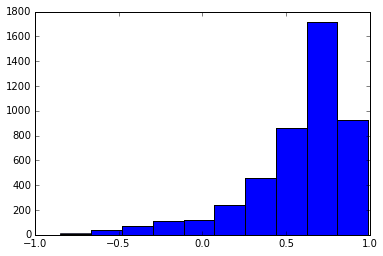

In [738]:
plt.hist(score_list)
plt.show()
# plt.hist(pos_test)
# plt.show()
# plt.hist(neg_test)
# plt.show()
# print neu_test